In [4]:
import numpy as np
import pandas as pd

Air quality data obtained from https://aqicn.org/historical/

In [42]:
air_voe = pd.read_excel('wiener-straße 233, straßenbahnstation neue welt-air-quality.xlsx', index_col=0)

In [43]:
air_voe.sort_values(by='date', inplace = True)

In [185]:
air_voe.head()

,pm25,pm10,no2,so2,co
date,,,,,
2013-12-31,NaN,28.00000000,11.00000000,1.00000000,NaN
2014-01-01,78.00000000,32.00000000,16.00000000,1.00000000,NaN
2014-01-02,90.00000000,43.00000000,19.00000000,1.00000000,NaN
2014-01-03,121.00000000,25.00000000,13.00000000,1.00000000,NaN
2014-01-04,79.00000000,14.00000000,14.00000000,1.00000000,NaN


In [5]:
import seaborn as sns

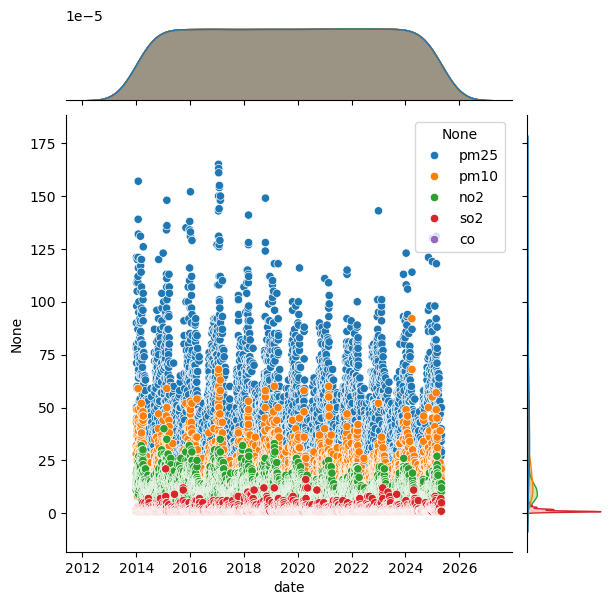

In [186]:
sns.jointplot(air_voe)

Checking for missing values

<Axes: ylabel='date'>

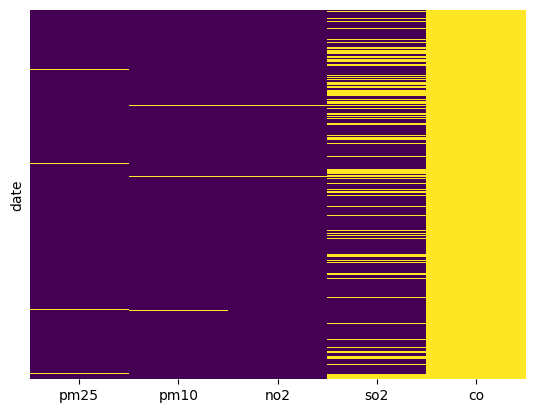

In [187]:
sns.heatmap(air_voe.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Verifying there are no CO readings

In [188]:
air_voe['co'].value_counts()

Series([], Name: count, dtype: int64)

In [44]:
air_voe.drop('co', axis=1, inplace=True)

A brief overview shows cyclicity in emissions

<Axes: xlabel='date'>

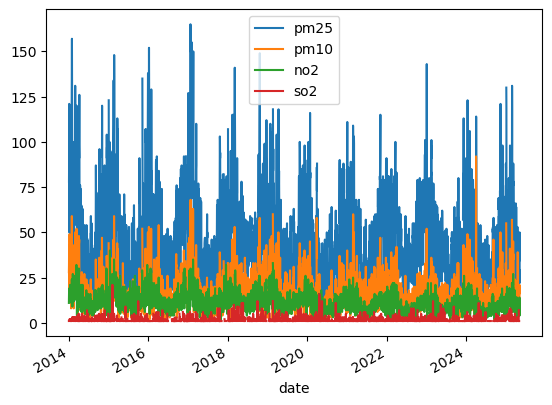

In [190]:
air_voe.plot()

Emission data for 2024

<Axes: xlabel='date'>

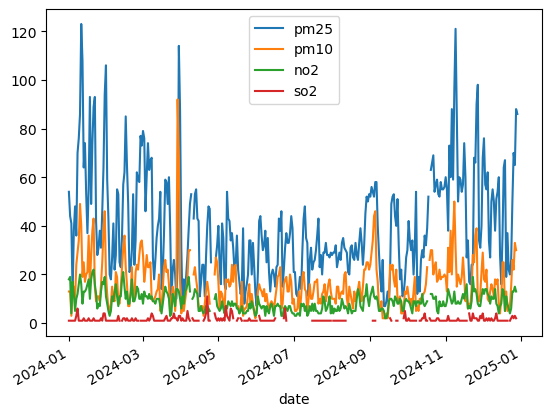

In [191]:
air_voe[air_voe.index.map(lambda d: d.year == 2024)].plot()

Estimated and reported earnings per share in EUR obtained from tradingview.com

In [12]:
earnings = pd.read_excel('Voest.xlsx', sheet_name=None, index_col=0)
earnings_qt = earnings['earnings_quarterly']
earnings_an = earnings['earnings_annual']

In [13]:
earnings_qt.head()

,Reported,Estimate,Surprise
Quarter,,,
Q4 '19,‪0.12‬,‪0.07‬,0.7143
Q1 '20,‪−0.40‬,‪−0.69‬,0.4203
Q2 '20,‪−1.13‬,‪−0.43‬,−161.27%
Q3 '20,‪0.66‬,‪0.10‬,5.8276
Q4 '20,‪1.12‬,‪0.56‬,1.0095


In [14]:
earnings_an.head()

,Reported,Estimate,Surprise
2015,‪3.18‬,‪3.00‬,0.0615
2016,‪2.84‬,‪2.73‬,0.0384
2017,‪4.40‬,‪4.17‬,0.0554
2018,‪2.31‬,‪2.36‬,−2.10%
2019,‪−1.24‬,‪−1.46‬,0.1486


In [15]:
import yfinance as yf

In [16]:
from time import sleep

In [98]:
voe_prices = []
for i in range(10):
    voe_prices.append(yf.Ticker('VOE.VI').history(start=f'20{15+i}-01-01', end=f'20{15+i}-12-31', period='1d'))
    sleep(100) # Trying not to get rate limited

In [99]:
voe_prices

[                                 Open        High         Low       Close  \
 Date                                                                        
 2015-01-02 00:00:00+01:00 23.83601946 23.94780902 23.63408129 23.84323311   
 2015-01-05 00:00:00+01:00 23.61244832 23.66293287 22.73978233 22.73978233   
 2015-01-07 00:00:00+01:00 22.79747849 22.94171985 22.44769074 22.57750893   
 2015-01-08 00:00:00+01:00 22.75059965 23.12923513 22.50538782 23.08235741   
 2015-01-09 00:00:00+01:00 22.71814696 22.71814696 22.04742049 22.36475372   
 ...                               ...         ...         ...         ...   
 2015-12-22 00:00:00+01:00 20.00357347 20.26658308 19.91096434 20.15174866   
 2015-12-23 00:00:00+01:00 20.27029035 21.10377267 20.27029035 20.82964897   
 2015-12-28 00:00:00+01:00 21.05191256 21.05191256 20.74444950 20.85928535   
 2015-12-29 00:00:00+01:00 21.10006639 21.10006639 20.75926543 20.79630852   
 2015-12-30 00:00:00+01:00 20.93337089 21.20749459 20.82964910 2

In [100]:
voe = pd.concat(voe_prices, axis=0)
voe.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00+01:00,23.83601946,23.94780902,23.63408129,23.84323311,94407,0.00000000,0.00000000
2015-01-05 00:00:00+01:00,23.61244832,23.66293287,22.73978233,22.73978233,297722,0.00000000,0.00000000
2015-01-07 00:00:00+01:00,22.79747849,22.94171985,22.44769074,22.57750893,432544,0.00000000,0.00000000
2015-01-08 00:00:00+01:00,22.75059965,23.12923513,22.50538782,23.08235741,247173,0.00000000,0.00000000
2015-01-09 00:00:00+01:00,22.71814696,22.71814696,22.04742049,22.36475372,517766,0.00000000,0.00000000


In [111]:
voe.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-19 00:00:00+01:00,18.10000038,18.12999916,17.80999947,17.89999962,511083,0.00000000,0.00000000
2024-12-20 00:00:00+01:00,17.78000069,18.05999947,17.54999924,17.98999977,826490,0.00000000,0.00000000
2024-12-23 00:00:00+01:00,18.00000000,18.20000076,17.75000000,18.20000076,278228,0.00000000,0.00000000
2024-12-27 00:00:00+01:00,18.20000076,18.48999977,18.12999916,18.15999985,297675,0.00000000,0.00000000
2024-12-30 00:00:00+01:00,18.10000038,18.32999992,18.04999924,18.32999992,239373,0.00000000,0.00000000


In [103]:
voe.sort_index(inplace=True)

In [107]:
voe.drop_duplicates(inplace=True)

In [108]:
pd.to_pickle(voe, 'voe')

<Axes: xlabel='Date'>

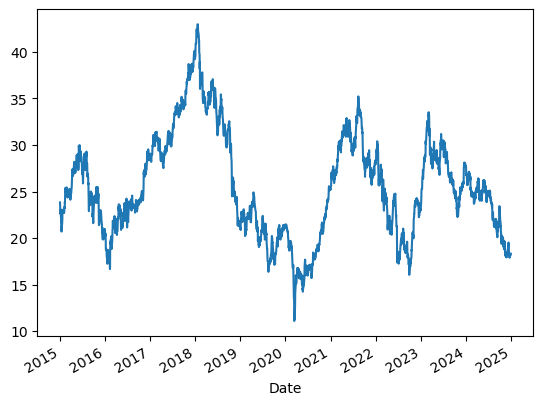

In [110]:
voe['Close'].plot()

In [21]:
coil_prices = []
for i in range(10):
    coil_prices.append(yf.Ticker('EHR=F').history(start=f'20{15+i}-01-01', end=f'20{16+i}-05-01', period='1d'))
    sleep(100) # Trying not to get rate limited

$EHR=F: possibly delisted; no price data found  (1d 2015-01-01 -> 2016-05-01)
$EHR=F: possibly delisted; no price data found  (1d 2016-01-01 -> 2017-05-01)
$EHR=F: possibly delisted; no price data found  (1d 2017-01-01 -> 2018-05-01)
$EHR=F: possibly delisted; no price data found  (1d 2018-01-01 -> 2019-05-01)
$EHR=F: possibly delisted; no price data found  (1d 2019-01-01 -> 2020-05-01)
$EHR=F: possibly delisted; no price data found  (1d 2020-01-01 -> 2021-05-01)
$EHR=F: possibly delisted; no price data found  (1d 2021-01-01 -> 2022-05-01)
$EHR=F: possibly delisted; no price data found  (1d 2022-01-01 -> 2023-05-01)
$EHR=F: possibly delisted; no price data found  (1d 2023-01-01 -> 2024-05-01)
$EHR=F: possibly delisted; no price data found  (1d 2024-01-01 -> 2025-05-01)


Obtained air quality data for Graz and Linz from https://eeadmz1-downloads-webapp.azurewebsites.net/

In [1]:
import os

In [2]:
linzgraz = os.listdir('./linzgraz')

In [5]:
linzgraz_files = [pd.read_parquet(f'./linzgraz/{f}') for f in linzgraz]    

See what the data is for:

In [17]:
[d['Pollutant'][0] for d in linzgraz_files]

[5, 6001, 5, 5, 6001, 5, 6001, 5, 6001, 5]

Key: https://dd.eionet.europa.eu/vocabulary/aq/pollutant
5: Particulate matter < 10 um
6001: Particulate matter < 2.5 um

In [19]:
poll = {5: 'pm10', 6001: 'pm25'}

Combine all the data:

In [29]:
linzgraz_files[0][['Start', 'Pollutant', 'Value']].rename(columns={'Value':poll[linzgraz_files[0].iloc[0]['Pollutant']], 'Start':'date'}).drop('Pollutant',axis=1).set_index('date')

,pm10
date,
2013-01-01,105.000000000000000000
2013-01-02,38.000000000000000000
2013-01-03,24.000000000000000000
2013-01-04,10.000000000000000000
2013-01-05,3.000000000000000000
...,...
2023-12-01,21.000000000000000000
2023-12-02,16.000000000000000000
2023-12-03,19.000000000000000000


In [37]:
air_linzgraz = pd.concat([d[['Start', 'Pollutant', 'Value']].rename(columns={'Value':poll[d.iloc[0]['Pollutant']], 'Start':'date'}).drop('Pollutant',axis=1).set_index('date').sort_index() for d in linzgraz_files])

In [38]:
air_linzgraz[['pm10','pm25']] = air_linzgraz[['pm10','pm25']].map(float)

In [47]:
air_linzgraz.drop_duplicates(inplace=True)
air_linzgraz.sort_index(inplace=True)

<Axes: xlabel='date'>

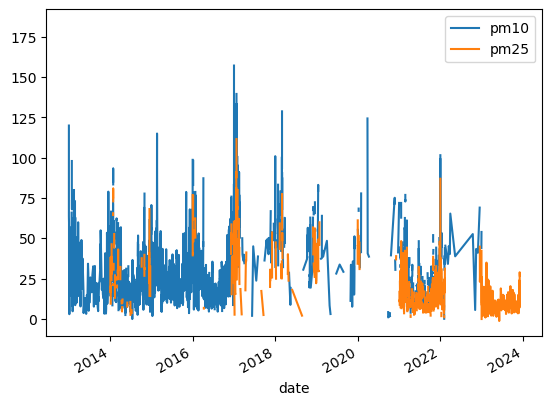

In [48]:
air_linzgraz.plot()

In [40]:
pd.to_pickle(air_linzgraz, 'air_linzgraz')

<Axes: xlabel='date'>

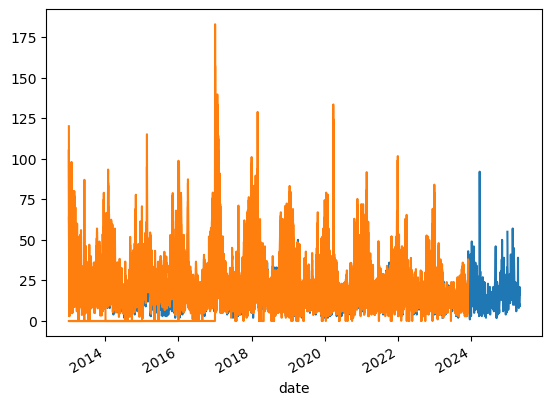

In [46]:
air_voe['pm10'].plot()
air_linzgraz['pm10'].plot()

<Axes: xlabel='date'>

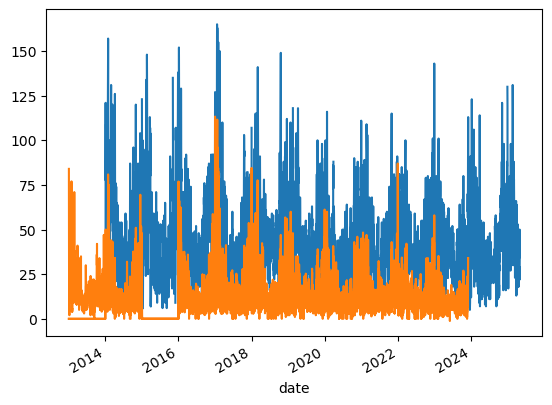

In [45]:
air_voe['pm25'].plot()
air_linzgraz['pm25'].plot()

In [251]:
air = air_voe.join(linzgraz_p25).rename(columns={'Value': 'pm25_linzgraz'}).dropna()

<Axes: >

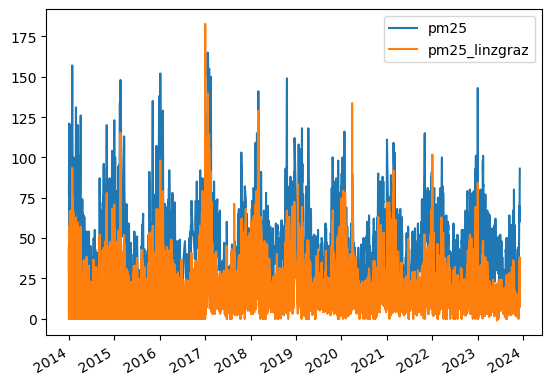

In [252]:
air[['pm25', 'pm25_linzgraz']].plot()

In [260]:
air_austria = os.listdir('./air_austria')

In [264]:
air_at = pd.read_parquet(f'./air_austria/{air_austria[0]}')
air_at.head()

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog
0,AT/SPO.06.177.66039.7.1,7,1994-01-01 00:00:00,1994-01-01 01:00:00,16.462000000000000000,ug.m-3,hour,1,1,1995-01-01,None,908b5ec8-130c-4e46-a4f2-7573f22b784c
1,AT/SPO.06.177.66039.7.1,7,1994-01-01 01:00:00,1994-01-01 02:00:00,8.979000000000000000,ug.m-3,hour,1,1,1995-01-01,None,908b5ec8-130c-4e46-a4f2-7573f22b784c
2,AT/SPO.06.177.66039.7.1,7,1994-01-01 02:00:00,1994-01-01 03:00:00,7.982000000000000000,ug.m-3,hour,1,1,1995-01-01,None,908b5ec8-130c-4e46-a4f2-7573f22b784c
3,AT/SPO.06.177.66039.7.1,7,1994-01-01 03:00:00,1994-01-01 04:00:00,6.984000000000000000,ug.m-3,hour,1,1,1995-01-01,None,908b5ec8-130c-4e46-a4f2-7573f22b784c
4,AT/SPO.06.177.66039.7.1,7,1994-01-01 04:00:00,1994-01-01 05:00:00,8.481000000000000000,ug.m-3,hour,1,1,1995-01-01,None,908b5ec8-130c-4e46-a4f2-7573f22b784c
